# HOMEWORK-2 (HW2)

## Due 27 Jan 2017 (Friday, 11:59pm)

**Important Note:** Before uploading your homework on Canvas, please name your file as following:

*HW#_FirstLastName.ipynb*

where "#" denotes the homework number, "First_LastName" is the name of the student (for example, HW1_Mickey_Mouse.ipynb). Each student will hand in their own file even if two students in the cohort work together. If you work with another student, please write her/his name on top of the first cell (as a comment or Markdown cell).

**Question-1:** What did you learn in **Week-2**? Please *briefly* explain in the cell below.

*I learned a lot about different algorithms to find the optimum value of a problem. This optimum does not always have to be the maximum, and can also be the minimum. I learned the problems these algorithms faced when it came to non-convex functions. Additionally, I learned the Hill-Climbing algorithm which does not need to know the value of f(x) when trying to find the optimum solution.*

**NOTE:** You will be searching for the **MINIMUM** of the following function **f(x)** in **Question-2-3-4-5**. Please draw the function with the blue line and then add the optimal solutions found for each seed number with a green or red marker and comment about the local or global optima.
                        
$$f(x) = (6x-2)^2 sin(12x-4),\:\: x \in [0,1]. $$

**Question-2:** Implement **Algorithm-1** from *Essentials of Metaheuristics* ebook, page-13. Run the algorithm using *seed*=1,2,...,30 for the random number generator (either using **numpy** or **random** modules). You need to choose a small $\alpha$ value (for example, $10^{-3}$ or $10^{-4}$).

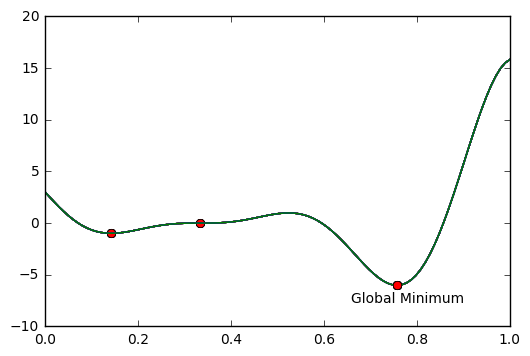

In [64]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#main function that starts the process
def main():
    start_program()
    plt.show()

#function that graphs both the original "line" as well as the optimum values
def graph_function(x):
    xOriginal = np.linspace(0,1,100)
    y = (6*xOriginal - 2)*(6*xOriginal - 2)* np.sin(12*xOriginal - 4) 
    plt.plot(xOriginal,y, x, (6*x - 2)*(6*x - 2)* np.sin(12*x - 4), 'ro')

#seed from 1 - 31
def start_program():
    optimumValues = []
    for i in range(1, 31):
        np.random.seed(i)
        optimumValues.append(gradient_ascent(np.random.rand()))
    get_global_minimum(optimumValues)

#gets the co-ordinates of the global minimum value
def get_global_minimum(optimumValues):
    x = (6*optimumValues[0] - 2)*(6*optimumValues[0] - 2)* np.sin(12*optimumValues[0] - 4)
    xBest = x
    for i in optimumValues:
        x = (6*i - 2)*(6*i - 2)* np.sin(12*i - 4)
        if(xBest > x):
            xBest = x
            indexBest = i
    plt.annotate('Global Minimum', 
             xy=(indexBest - 0.1, xBest - 1.7),  
             xycoords='data')
    
#calculates the derivative of the given number 
def derivative_calculator(numCandidate):
    return (24*(3*numCandidate - 1)* (np.sin(12*numCandidate - 4) + (6*numCandidate - 2)* np.cos(12*numCandidate - 4)))
        
#algorithm1 
def gradient_ascent(randNum):
    
    alpha = pow(10, -4) #alpha number 10^-4
    x = randNum 
    boolean = True
    #while loop that ends only if the derivative value is < 0.001 and > -0.001
    while boolean: 
        derivative_at_x = derivative_calculator(x)
        change = alpha*derivative_at_x
        x = x - change 
        if(derivative_at_x < pow(10, -3) and derivative_at_x > - pow(10, -3)):
            boolean = False
    graph_function(x)
    return x
    
main()

**Question-3:** Implement **Algorithm-3** from *Essentials of Metaheuristics* ebook, page-15. Run the algorithm using *seed*=1,2,...,30 for the random number generator (either using **numpy** or **random** modules). You need to choose a small $\alpha$ value (for example, $10^{-3}$ or $10^{-4}$).

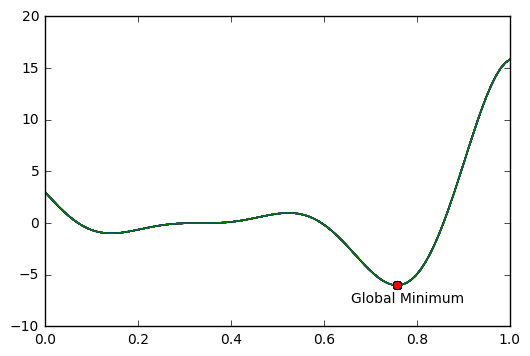

In [65]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#main function that starts the process
def main():
    start_program()
    plt.show()

#function that graphs both the original "line" as well as the optimum values
def graph_function(x):
    xOriginal = np.linspace(0,1,100)
    y = (6*xOriginal - 2)*(6*xOriginal - 2)* np.sin(12*xOriginal - 4) 
    plt.plot(xOriginal,y, x, (6*x - 2)*(6*x - 2)* np.sin(12*x - 4), 'ro') 

#seed from 1 - 31
def start_program():
    optimumValues = []
    for i in range(1, 31):
        np.random.seed(i)
        optimumValues.append(gradient_ascent(np.random.rand()))
    get_global_minimum(optimumValues)

#gets the co-ordinates of the global minimum value
def get_global_minimum(optimumValues):
    x = (6*optimumValues[0] - 2)*(6*optimumValues[0] - 2)* np.sin(12*optimumValues[0] - 4)
    xBest = x
    for i in optimumValues:
        x = (6*i - 2)*(6*i - 2)* np.sin(12*i - 4)
        if(xBest > x):
            xBest = x
            indexBest = i
    plt.annotate('Global Minimum', 
             xy=(indexBest - 0.1, xBest - 1.7),  
             xycoords='data')

#method that generated a new random number given a previous seed
def new_rand_num():
    return np.random.rand()

#calculates the derivative of the given number 
def derivative_calculator(numCandidate):
    return (24*(3*numCandidate - 1)* (np.sin(12*numCandidate - 4) + (6*numCandidate - 2)* np.cos(12*numCandidate - 4)))

#algorithm2
def gradient_ascent(randNum):
    
    alpha = pow(10, -3)
    x = randNum 
    xResult = x #new best solution
    
    for i in range(100):
        boolean = True
        while boolean:
            derivative_at_x = derivative_calculator(x)
            change = alpha*derivative_at_x
            x = x - change 
            if(derivative_at_x < pow(10, -3) and derivative_at_x > - pow(10, -3)):
                boolean = False
        if(((6*x - 2)*(6*x - 2)* np.sin(12*x - 4)) < ((6*xResult - 2)*(6*xResult - 2)* np.sin(12*xResult - 4))):
            xResult = x
        x = new_rand_num()
    graph_function(xResult)
    return xResult
    
    
main()


**Question-4:** Implement **Algorithm-6** from *Essentials of Metaheuristics* ebook, page-18. Run the algorithm using *seed*=1,2,...,30 for the random number generator (either using **numpy** or **random** modules). You need to choose a small *r* value (for example, $10^{-3}$ or $10^{-4}$).

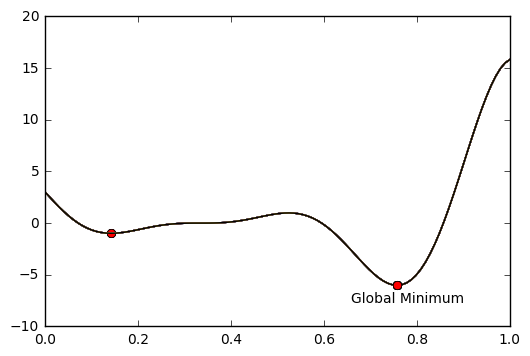

In [66]:
import numpy as np 
import matplotlib.pylab as plt 
%matplotlib inline 

def main():
    start_program()
    plt.show()
        
def start_program():
    optimumValues = []
    for i in range(1, 31):
        np.random.seed(i)
        optimumValues.append(hill_algorithm(np.random.rand()))
    get_global_minimum(optimumValues)

#gets the co-ordinates of the global minimum value
def get_global_minimum(optimumValues):
    x = (6*optimumValues[0] - 2)*(6*optimumValues[0] - 2)* np.sin(12*optimumValues[0] - 4)
    xBest = x
    for i in optimumValues:
        x = (6*i - 2)*(6*i - 2)* np.sin(12*i - 4)
        if(xBest > x):
            xBest = x
            indexBest = i
    plt.annotate('Global Minimum', 
             xy=(indexBest - 0.1, xBest - 1.7),  
             xycoords='data')
    
def hill_algorithm(candidate_solution):
    
    n = 100
    s = candidate_solution
    best = s
    run = True
    count = 0
    max_time = 10000
    
    while run:
        count += 1
        r = tweak(s)
        for i in range(n - 1):
            w = tweak(s)
            if quality(w) < quality(r):
                r = w
        s = r
        if quality(s) < quality(best):
            best = s
            derivative_at_best = derivative_calculator(best)
            if(derivative_at_best < 0.1 and derivative_at_best > -0.1 and best < 1):
                run = False
            elif count > max_time:
                return 0
    graph_function(best)
    return best


def derivative_calculator(numCandidate):
    return (24*(3*numCandidate - 1)* (np.sin(12*numCandidate - 4) + (6*numCandidate - 2)* np.cos(12*numCandidate - 4)))

def tweak(s):
    return s + pow(10, -4)

def quality(num):
    yVal = (6*num - 2)*(6*num - 2)* np.sin(12*num - 4)
    return yVal

def graph_function(x):
    xOriginal = np.linspace(0,1,100)
    y = (6*xOriginal - 2)*(6*xOriginal - 2)* np.sin(12*xOriginal - 4) 
    plt.plot(xOriginal,y, x, (6*x - 2)*(6*x - 2)* np.sin(12*x - 4), 'ro') 
    

main()

**Question-5:** Implement **Algorithm-10** from *Essentials of Metaheuristics* ebook, page-21. Run the algorithm using *seed*=1,2,...,30 for the random number generator (either using **numpy** or **random** modules). You need to choose a small *r* value (for example, $10^{-3}$ or $10^{-4}$).

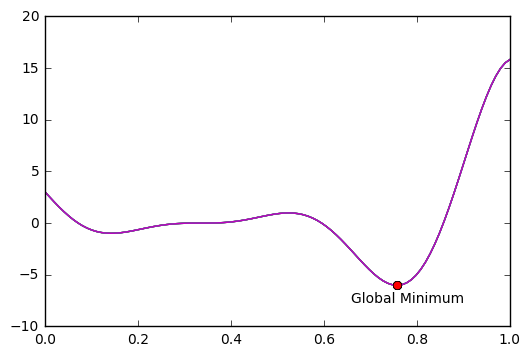

In [1]:
import numpy as np 
import matplotlib.pylab as plt 
%matplotlib inline 

def main():
    start_program()
    plt.show()
        
def start_program():
    optimumValues = []
    for i in range(1, 31):
        np.random.seed(i)
        optimumValues.append(hill_algorithm(np.random.rand()))
    get_global_minimum(optimumValues)

#gets the co-ordinates of the global minimum value
def get_global_minimum(optimumValues):
    x = (6*optimumValues[0] - 2)*(6*optimumValues[0] - 2)* np.sin(12*optimumValues[0] - 4)
    xBest = x
    for i in optimumValues:
        x = (6*i - 2)*(6*i - 2)* np.sin(12*i - 4)
        if(xBest > x):
            xBest = x
            indexBest = i
    plt.annotate('Global Minimum', 
             xy=(indexBest - 0.1, xBest - 1.7),  
             xycoords='data')
    
def hill_algorithm(candidate_solution):
    
    times = [100, 500, 1000, 2500]
    s = candidate_solution
    best = s
    boolean = True
    count = 0
    
    while boolean:
        count += 1
        r = tweak(s)
        for i in range(times[np.random.randint(0, 3)]):
            w = tweak(s)
            if quality(w) < quality(r):
                r = w
        s = r
        if quality(s) < quality(best):
            best = s
            derivative_at_best = derivative_calculator(best)
            if(derivative_at_best < 0.1 and derivative_at_best > -0.1 and best < 1):
                boolean = False
            elif count > 100:
                return 0
        s = np.random.rand()
    graph_function(best)
    return best

def derivative_calculator(numCandidate):
    return (24*(3*numCandidate - 1)* (np.sin(12*numCandidate - 4) + (6*numCandidate - 2)* np.cos(12*numCandidate - 4)))

def tweak(s):
    return s + pow(10, -4)

def quality(num):
    yVal = (6*num - 2)*(6*num - 2)* np.sin(12*num - 4)
    return yVal

def graph_function(x):
    xOriginal = np.linspace(0,1,100)
    y = (6*xOriginal - 2)*(6*xOriginal - 2)* np.sin(12*xOriginal - 4) 
    plt.plot(xOriginal,y, x, (6*x - 2)*(6*x - 2)* np.sin(12*x - 4), 'ro') 

main()

**Question-6: (OPTIONAL)** You are given a tabular data ("profit.txt"), which has two columns, representing population in 10,000's (Column-1) and profit in \$10K's (Column-2). We think that a linear regression curve would be a good starting point for representing the relationship (hypothesis) between two columns. Note that negative value for profit indicates a loss. Please plot the data as markers (circles or crosses) together with the hypothesis (linear curve fit) and then make a prediction at the population of 17.5K.  

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy
%matplotlib inline


def main:
    readData("profits.txt")


def readData(filename):
    
    txt = open(filename)
    lines = txt.readlines()
    txt.close()
    
    x1 = []
    y1 = []
    for line in lines:
        p = line.split()
        x1.append(float(p[0]))
        y1.append(float(p[1]))
    plotData(x1, y1)
    # This function is supposed to read the "data.txt" file which contains x and y values
    # x: the population size in 10,000s
    # y: the profit in $10,000s
    #return x, y

def plotData(x, y):
    
    xData = np.array(x)
    yData = np.array(y)
    plt.plot(xData, yData)
    plt.show()
    
    # Prepare a 2D plot (x-y pairs with markers),
    # X-axis label: Population of City in 10,000s
    # y-axis label: Profit in $10,000s
    # title: Profits distribution

    # return nothing other than plotting the data
    
    
def hypothesis(x, theta):
    # x is our 1D sample set
    # theta is the vector of hyperparameters for the model (hypothesis)
    # Our hypothesis (y_hat) is a linear model, 
    # y_hat[i] is the i-th prediction at x[i]:
    # y_hat[i] = theta[0] + theta[1]*x[i]
    
    return y_hat
    
def cost(y, x, theta):
    # Compute the mean squared error: sum(Errors)/(2 times number of samples)
    # y_hat[i] = hypothesis(x[i], theta)
    # Error[i] = y[i] - y_hat[i]
    # cost = sum(Error[i]) / 2m, where m is the number of samples
    
    return cost
    
def computeGradient(x, theta0, delta=0.000001):
    # Numerical Differentiation computation
    # delta: very small perturbation value for numerical differentiation
    # default value for delta is 1e-6 (if user does not provide any value)
    # x is our 1D sample set (i.e., it is constant, change only theta vector)
    # theta = copy.deepcopy(theta0)
    # for each theta[i],
    #    Perturb theta: theta[i] = theta[i] + delta (We here change theta only one at a time!) 
    #    y_grad[i] = ( cost(x, theta) - cost(theta0) ) / delta
    #    where Cost is Mean Squared Error obtained from "Cost" function.
    #    Don't forget to initialize theta to theta0: theta = copy.deepcopy(theta0)
    
    return y_grad


def gradientDescent(x, y, theta, alpha=0.0001, n_iter=1000):
    # alpha: learning rate (default value is 1e-4)
    # niter: number of iterations for the Gradient Descent algorithm (default value is 1000)
    # Compute m: sample size (Ex: len(x))
    
    # Choose random theta for initializing the Gradient Descent
    theta = [0.0, 0.0] # you can initialize randomly
    
    for it in range(n_iter):
        # Compute Mean Square Error using cost function for all samples:
        
        # print Iteration#, Cost: 
        # """ Note: You can also save the Cost values in a Cost_history array
        # and plot it against the iterations """
        
        # Update the theta parameters (theta[0] and theta[1]):
        # theta = theta - alpha * Gradient_of_Cost_wrt_theta
        # Note that theta is a 2D-vector
        
    # print the final theta vector:
    
    return theta


# First, read the "data.txt" file (uploaded on Canvas):

# Choose initial guess for theta:

# Plot the data with the hypothesis using the initial guess of the theta:

# Start the optimization:

# Plot the (optimized) hypothesis on the given sample set:

# make a prediction at population of 17.5K:


I am including the resulting figure below to help you compare your results:

<img src="hypothesis.png">

and the hypothesis looks like:

$$ \hat{y} = -3.788069 + 1.182213x $$